In [24]:
import os
import numpy as np
import matplotlib.pylab as plt
plt.rcParams.update({'font.size': 12})

In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
from polefigure import *
import cristallo as cr
from tabulate import tabulate

In [27]:
# =================
#  Import csv data
# =================
data_dir = 'data'
filename = 'figPole_test.csv'

file_path = os.path.join(data_dir, filename)
phi_deg, psi_deg, intensity = read_polefig_csv(file_path)

example/hkl_test.png saved


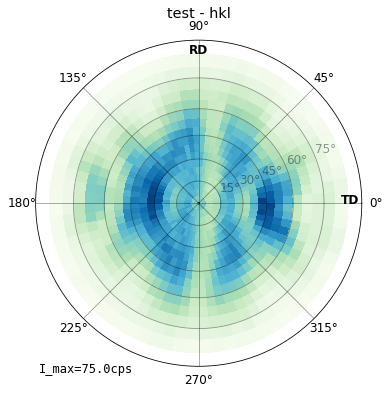

In [28]:
# graph parameters:
sample_name = 'test'
hkl_name = 'hkl' #filename.split('.')[0].split('_')[-1]

colormap = 'YlOrRd' if 'Cu' in filename else 'GnBu'

# graph
fig, ax = plot_polefigure(phi_deg, psi_deg, intensity,
                          cmap=colormap,
                          title=f'{sample_name} - {hkl_name}')

# Add ARB rolling directions
coords = stereographic_projection(90., 85)
ax.text(*coords, 'RD', weight='bold', ha='center');

coords = stereographic_projection(0., 82)
ax.text(*coords, 'TD', weight='bold');


# Save option
output_dir = 'example'
output_format = 'png'  # svg, pdf
output_filename = f'{hkl_name}_{sample_name}.{output_format}'

output_path = os.path.join(output_dir, output_filename)
fig.savefig(output_path)
print(f'{output_path} saved')
#plt.close()

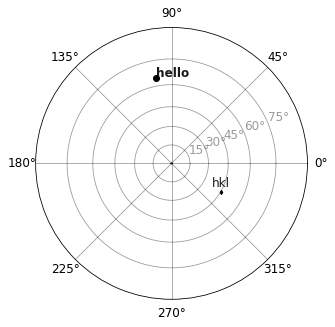

In [29]:
# ====================
#  Graph orientations
# ====================

# Example
fig, ax = polar_axis(figsize=(5, 5))
plot_direction(ax, 100, 65, label='hello',
              color='black', marker='o', weight='bold',
              label_position='right', markersize=6)

plot_direction(ax, -30, 45, label='hkl',
               color='black', marker='d', label_position='center')

In [30]:
# =================================
#  Graph all equivalent directions 
# =================================

hkl_figure = (1, 1, 2)
eq_directions = cr.equivalent_directions(hkl_figure)

# Variant (i.e. texture)
n = (3, 3, -8)
phi0 = (8, 8, 6)

eq_dir = list_eq_directions(hkl_figure, phi0, n)
print(tabulate(eq_dir, headers='keys'))

hkl           phi        psi
------  ---------  ---------
1-1-2    123.528    43.8351
1-2-1    117.264    76.9726
21-1      26.7059   39.9666
-1-1-2   180        63.2027
-11-2   -123.528    43.8351
-1-2-1   163.204    92.584
-2-1-1  -163.204    92.584
2-1-1     85.7894   60.2697
-12-1    -85.7894   60.2697
-21-1   -117.264    76.9726
11-2       0         7.32604
12-1     -26.7059   39.9666
121      -16.7962   87.416
-112     -56.472   136.165
-1-12    180       172.674
-121     -62.7358  103.027
2-11      62.7358  103.027
-211     -94.2106  119.73
-1-21    153.294   140.033
-2-11   -153.294   140.033
211       16.7962   87.416
112        0       116.797
1-21      94.2106  119.73
1-12      56.472   136.165


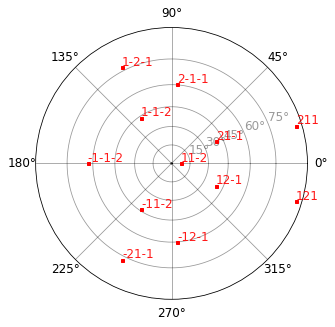

In [35]:
fig, ax = polar_axis(figsize=(5, 5))
plot_many_directions(ax, eq_dir, 
                         color='red', marker='s', markersize=3,
                         label=None, label_position='right')